In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.shape

(9994, 13)

In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Since there are no null values, we'll move forward. We will encode values for Region and Category

In [8]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
data.iloc[:,6]=labelencoder.fit_transform(data.iloc[:,6].values)

In [10]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
data.iloc[:,7]=labelencoder.fit_transform(data.iloc[:,7].values)

Data now looks as follows:

In [12]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,2,0,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,2,0,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,3,1,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,2,0,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,2,1,Storage,22.3680,2,0.20,2.5164


In [14]:
#correlation matrix
data.corr()

,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Postal Code,1.000000,0.474774,-0.002331,-0.023854,0.012761,0.058443,-0.029961
Region,0.474774,1.000000,-0.005148,0.004216,0.013506,-0.212769,0.022216
Category,-0.002331,-0.005148,1.000000,0.040077,-0.003619,-0.062897,0.091506
Sales,-0.023854,0.004216,0.040077,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.013506,-0.003619,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.212769,-0.062897,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.022216,0.091506,0.479064,0.066253,-0.219487,1.000000


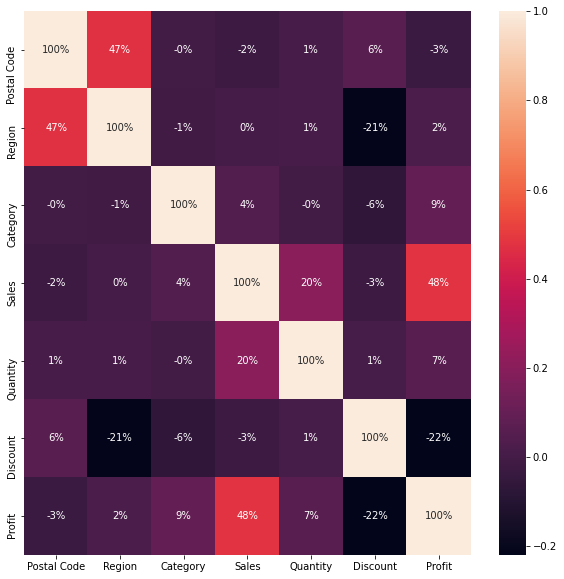

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True,fmt='.0%')

From the above heatmap, we see that Profit is positively influenced by Sales,Region,Category and quantity. Profit is also negatively influenced by the discount offered.

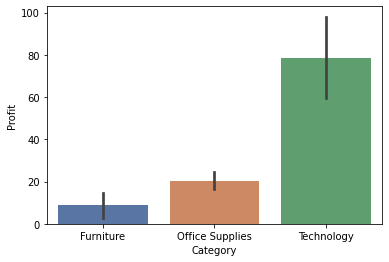

In [ ]:
sns.barplot(x="Category", y="Profit", data=data,palette="deep")

We can see that Technology Items bring in the maximum Profit

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

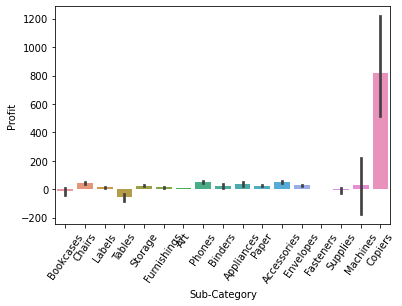

In [ ]:
sns.barplot(x='Sub-Category',y='Profit',data=data)
plt.xticks(rotation=55)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

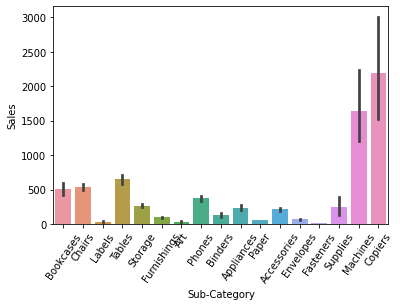

In [ ]:
sns.barplot(x='Sub-Category',y='Sales',data=data)
plt.xticks(rotation=55)

We see that even though Machines sell in high quantity, they yeild low profits.

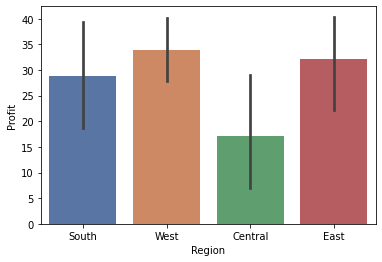

In [ ]:
sns.barplot(x="Region", y="Profit", data=data,palette="deep")

We see that in the Central Region,the Profits are the least

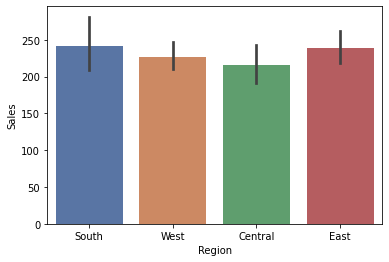

In [ ]:
sns.barplot(x="Region", y="Sales", data=data,palette="deep")

However, we see that Sales in the Central Region are comparable with the rest of the Regions despite being the least. Therefore, Central Region requires improvement.

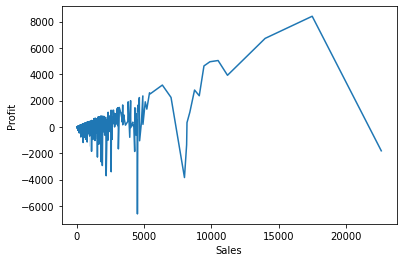

In [ ]:
sns.lineplot(x='Sales', y='Profit', data=data)

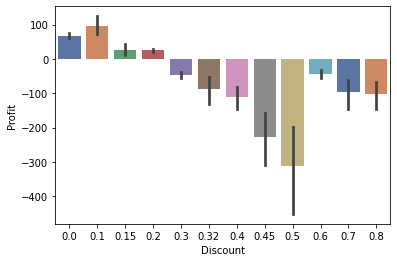

In [ ]:
sns.barplot(x="Discount",y="Profit",data= data,palette="deep")

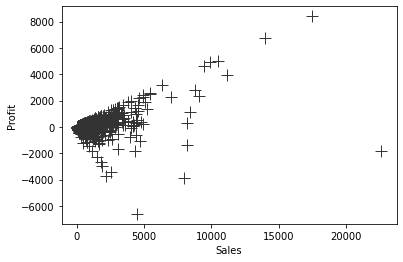

In [ ]:
sns.scatterplot(x="Sales",y="Profit",data=data,s=150,color=".2", marker="+")

Higher Sales lead to more profit and higher discount causes lower profits 
